In [1]:
# Basic machine learning models (Supervised and Unsupervised learning)
"""
0. Define hypothesis (understand business context and problem statements)
1. Load the dataset
2. Explore the dataset using charts or some statistical models
3. Preprocess the data (Are there any null values?, Are all columns relevent? Are there outcome? 
   Are the columns independent?)
4. Apply preprocess values (Transformation of the columns after preprocessing decisions)
5. Split training and test data
6. Select the model (What is the category of the problem? Classification or regression? labeled or 
   non-labeled data?)
7. Fit the model with training data (what is the accuracy score?)
8. Validate the model with test data (what is the accuracy score?)
9. Optimize the model if the accuracy score is not satisfactory (Select parameters that can improve 
   the accuracy and apply to model)
10. Run the model with new test data
11. Save the model
12. Deploy the model (Desktop or web app or mobile app or IOT device)
"""

'\n0. Define hypothesis (understand business context and problem statements)\n1. Load the dataset\n2. Explore the dataset using charts or some statistical models\n3. Preprocess the data (Are there any null values?, Are all columns relevent? Are there outcome? \n   Are the columns independent?)\n4. Apply preprocess values (Transformation of the columns after preprocessing decisions)\n5. Split training and test data\n6. Select the model (What is the category of the problem? Classification or regression? labeled or \n   non-labeled data?)\n7. Fit the model with training data (what is the accuracy score?)\n8. Validate the model with test data (what is the accuracy score?)\n9. Optimize the model if the accuracy score is not satisfactory (Select parameters that can improve \n   the accuracy and apply to model)\n10. Run the model with new test data\n11. Save the model\n12. Deploy the model (Desktop or web app or mobile app or IOT device)\n'

In [1]:
import pandas as pd

In [2]:
loan = pd.read_csv('../DATASET/loan.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,N
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y


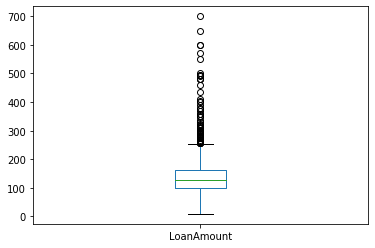

In [4]:
from matplotlib import pyplot
#loan.plot(kind='box')
loan.LoanAmount.plot(kind='box')

In [5]:
# check for missing values --> count : how many null values in each column
loan.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_status           0
dtype: int64

In [6]:
# majority of the loan applicants are Male 
loan['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [7]:
# fill the nulls with majority values
loan.Gender = loan.Gender.fillna('Male')

In [8]:
loan['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [9]:
loan.Married = loan.Married.fillna('Yes')

In [10]:
loan['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [11]:
loan.Dependents = loan.Dependents.fillna('0')

In [12]:
loan['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [13]:
loan.Self_Employed = loan.Self_Employed.fillna('No')

In [14]:
loan.LoanAmount = loan.LoanAmount.fillna(loan.LoanAmount.mean())

In [15]:
loan['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [16]:
loan.Loan_Amount_Term = loan.Loan_Amount_Term.fillna(360.0)

In [17]:
loan['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [18]:
loan.Credit_History = loan.Credit_History.fillna(1.0)

In [19]:
# check for missing values
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_status          0
dtype: int64

In [20]:
# replacing values
loan.Gender = loan.Gender.replace({'Male':0,'Female':1})

In [21]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
976,LP002978,1,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
977,LP002979,0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
978,LP002983,0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
979,LP002984,0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
980,LP002990,1,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [22]:
# replacing values
loan.Married = loan.Married.replace({'No':0,'Yes':1})
loan.Education = loan.Education.replace({'Not Graduate':0,'Graduate':1})
loan.Self_Employed = loan.Self_Employed.replace({'No':0,'Yes':1})
loan.Property_Area = loan.Property_Area.replace({'Rural':0,'Urban':1, 'Semiurban':2})

In [23]:
loan.Loan_status = loan.Loan_status.replace({'N':0,'Y':1})
loan.Dependents = loan.Dependents.replace({'3+':3})

In [24]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,LP001015,0,1,0,1,0,5720,0.0,110.0,360.0,1.0,1,1
1,LP001022,0,1,1,1,0,3076,1500.0,126.0,360.0,1.0,1,0
2,LP001031,0,1,2,1,0,5000,1800.0,208.0,360.0,1.0,1,1
3,LP001035,0,1,2,1,0,2340,2546.0,100.0,360.0,1.0,1,1
4,LP001051,0,0,0,0,0,3276,0.0,78.0,360.0,1.0,1,1


In [25]:
loan=loan.drop(['Loan_ID'],axis=1)

In [26]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,0,1,0,1,0,5720,0.0,110.0,360.0,1.0,1,1
1,0,1,1,1,0,3076,1500.0,126.0,360.0,1.0,1,0
2,0,1,2,1,0,5000,1800.0,208.0,360.0,1.0,1,1
3,0,1,2,1,0,2340,2546.0,100.0,360.0,1.0,1,1
4,0,0,0,0,0,3276,0.0,78.0,360.0,1.0,1,1


In [26]:
loan.shape

(981, 12)

In [ ]:
# out of 981 samples
# a portion of sample used for training and another portion used for testing (ratio is 80:20)

In [28]:
round(len(loan)*0.8)

785

In [ ]:
train = loan.iloc[0:785]
test = loan.iloc[785:]

In [27]:
from sklearn.model_selection import train_test_split
# X is every column except the last col --> features
X = loan[loan.columns[:-1]]
# Y is the last columns --> target column
Y = loan[loan.columns[-1]]
# splitting train and test data in the ratio of 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=6)

In [28]:
# build the model
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
Y_pred = classifier.predict(X_test)

In [30]:
classifier.score(X_train, Y_train)

0.7283163265306123

In [31]:
classifier.score(X_test, Y_test)

0.7360406091370558

In [32]:
# actual
X_test.iloc[70]

Gender                   0
Married                  1
Dependents               0
Education                1
Self_Employed            1
ApplicantIncome      16120
CoapplicantIncome        0
LoanAmount             260
Loan_Amount_Term       360
Credit_History           1
Property_Area            1
Name: 961, dtype: object

In [34]:
Y_test.iloc[70]

1

In [35]:
# predicted
Y_pred[70]

1

In [36]:
loan_approved = loan[loan['Loan_status']==1]

In [37]:
len(loan_approved)

640

In [38]:
loan_rejected = loan[loan['Loan_status']==0]
len(loan_rejected)

341

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [40]:
"""
TN FP
FN TP

"""
cm

array([[ 23,  46],
       [  6, 122]], dtype=int64)

In [41]:
#"""
#TN - 23 --- 23 cases of prediction for loan status =0 are correct
#FP - 46   --- 46 cases of prediction for loan status = 1 are NOT correct
#FN - 7  -- 7 cases of prediction for loan status =0 are NOT correct
#TP - 121  -- 121 cases of prediction for loan status = 1 are correct
#"""
# TN and TP are good predictions
# FP and FN are bad predictions

In [42]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [43]:
#Create a Gaussian Naive Bayes Classifier
model_nb = GaussianNB()

# Train the model using the training sets 
model_nb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
Y_pred_nb = model_nb.predict(X_test)

In [45]:
model_nb.score(X_train, Y_train)

0.7283163265306123

In [46]:
model_nb.score(X_test, Y_test)

0.7360406091370558

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_nb)

In [48]:
cm

array([[ 25,  44],
       [  8, 120]], dtype=int64)

In [49]:
# KNN 

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [52]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [53]:
Y_pred = neigh.predict(X_test)

In [54]:
neigh.score(X_test,Y_test)

0.5532994923857868

In [55]:
# Decsion tree
from sklearn.tree import DecisionTreeClassifier

In [56]:
#Create a decision tree  Classifier
d_model = DecisionTreeClassifier()
# Train the model using the training sets 
d_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
d_model.score(X_train,Y_train)

0.9987244897959183

In [58]:
d_model.score(X_test,Y_test)

0.6649746192893401

In [59]:
Y_pred_d = d_model.predict(X_test)

In [60]:
cm = confusion_matrix(Y_test, Y_pred_d)

In [61]:
cm

array([[35, 34],
       [32, 96]], dtype=int64)

In [62]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [63]:

# this is our parameter grid
param_grid = {
    'solver': ['liblinear', 'saga'],  
    'penalty': ['l1','l2'],
    'tol': (1e-5, 1e-3),
    'C': [ _ for _ in range(1,50)],
    'max_iter':[ _ for _ in range(1,150)]   
}

# set up our optimiser to find the best params in 30 searches
opt_logit = RandomizedSearchCV(LogisticRegression(), param_grid,verbose=0)

opt_logit.fit(X_train, Y_train)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'...5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 3

In [64]:
print('Best params achieve a test score of', opt_logit.score(X_test, Y_test), ':')
opt_logit.best_params_

Best params achieve a test score of 0.7360406091370558 :


{'tol': 1e-05,
 'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 128,
 'C': 28}

In [65]:
opt_logit.best_estimator_

LogisticRegression(C=28, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=128,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-05, verbose=0,
                   warm_start=False)

In [66]:
opt_logit_m = LogisticRegression(**opt_logit.best_params_)
opt_logit_m.fit(X_train, Y_train)

LogisticRegression(C=28, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=128,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-05, verbose=0,
                   warm_start=False)

In [67]:
opt_logit_m.score(X_test,Y_test)

0.7360406091370558

In [68]:
#saving the model

In [69]:
from joblib import dump, load
dump(opt_logit_m, 'loan_approval.joblib')

['loan_approval.joblib']

In [70]:
# load the saved model
loan_app = load('loan_approval.joblib')

In [71]:
# deployment of the the model in web app